Die ausgewählte Datei ist: C:/Users/mappe/Desktop/Datenbank.xlsx
Map saved to addresses_map.html
Filtered Addresses:
Name                                  Fahrrad Otto Berlin Karow
Straße                                             Achillesstr.
Hausnummer                                                   64
PLZ                                                       13125
Stadt                                                    Berlin
Kreis                                                       NaN
Bundesland                                               Berlin
Telefon                                            030 94380945
Email                                       info@fahrradotto.de
Latitude                                              52.616438
Longitude                                             13.491464
Address       Achillesstraße, Karow, Pankow, Berlin, 13125, ...
Name: 0, dtype: object
Name                                            Fahrrad Rütters
Straße                      

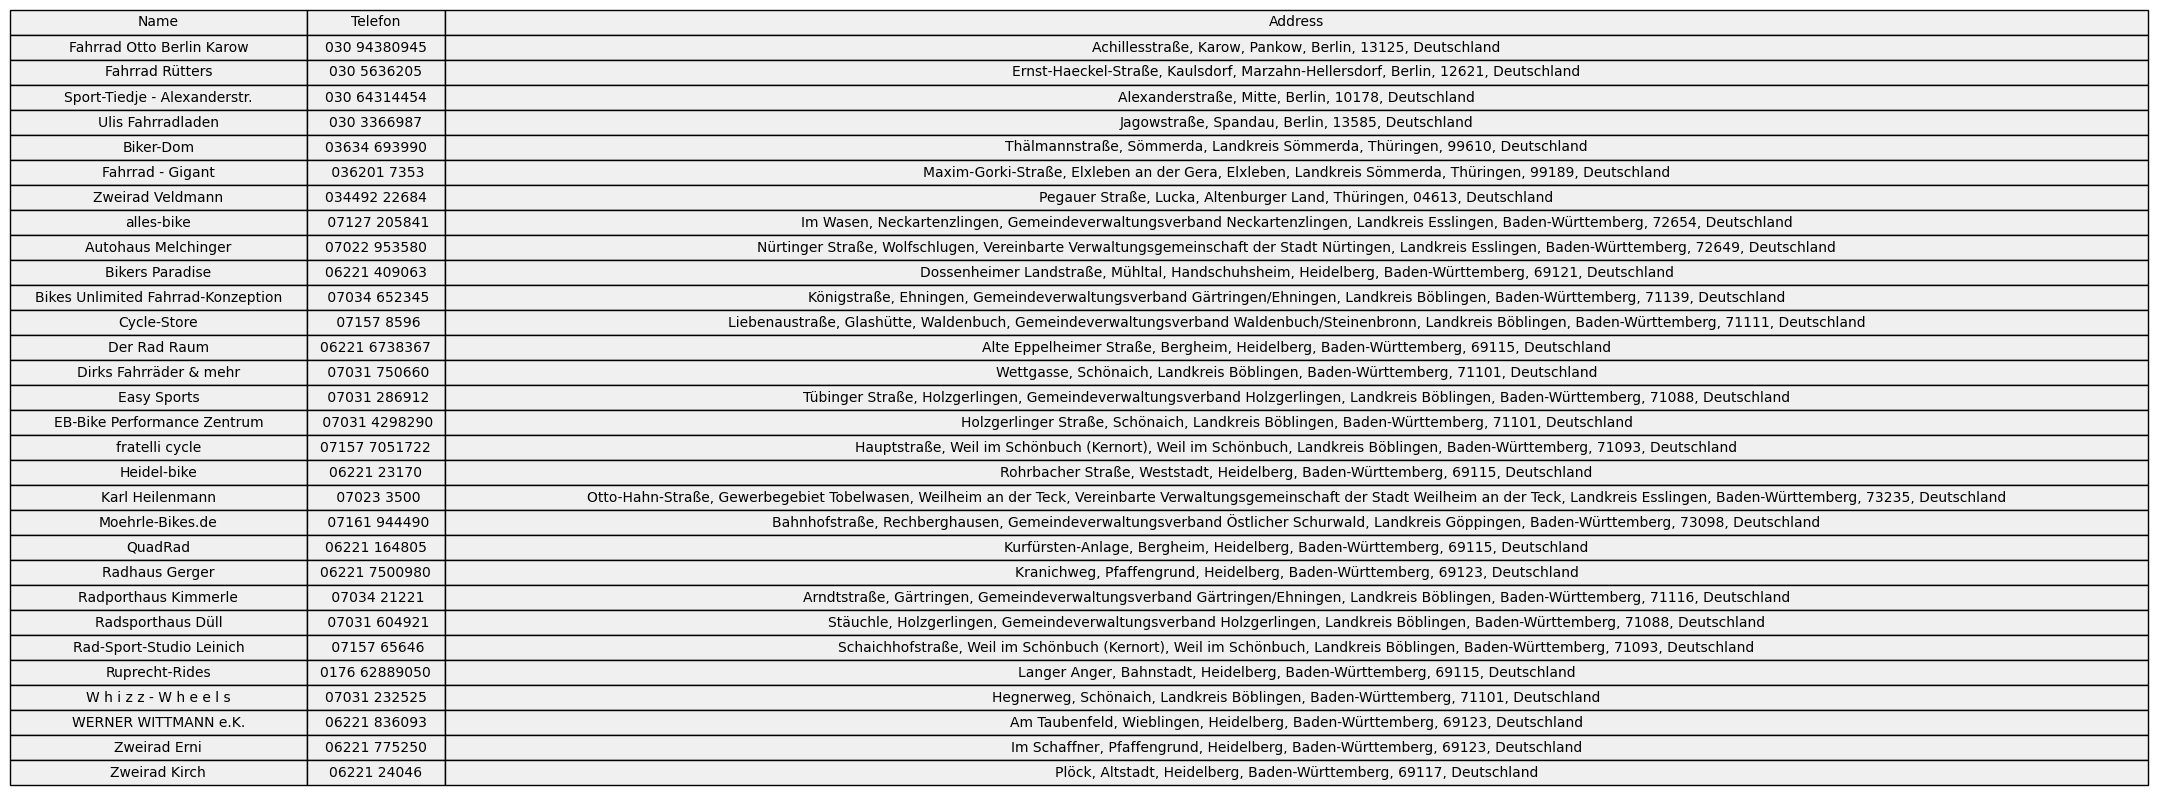

In [1]:
# Dieses Programm wurde mit Unterstützung von ChatGPT erstellt, für eine reibungslose Funktion sollte dieses Programm 
# in einem LOCALHost eines Jupyter Notebooks ausgeführt werden, da ansonsten die tkinter GUIs nicht gestartet werden.
# Neben diesem Programmteil wird die Datenbank mit der das Programm ausgeführt werden kann, zu Verfügung gestellt
#
# Ersteller:
# Amal Zouine
# Philipp Lüling
# Maximilian Appelhoff


!pip install pandas
!pip install geopy
!pip install folium
import pandas as pd # panda Data Bibliothek
import tkinter as tk # GUI Bibliothek
import matplotlib.pyplot as plt # Vorraussetzung für PDF Ausgabe
import folium #bibliothek für Interaktive Karten (hier verwendet für Marker)
from geopy.distance import geodesic #Iport für Entfernungsberechnung
from tkinter import filedialog # Klasse um auf das Dateisystem des Rechners zugreifen zu können
from geopy.geocoders import Nominatim # OSM Dienst für Geocoding

# Max | GUI zum hochladen einer Datei
global file_path
global data

def upload_file():
    global file_path
    file_path = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx;*.xls")])
    if file_path:
        print(f"Die ausgewählte Datei ist: {file_path}")

        labelAusgewählteDatei.config(text=f"Die ausgewählte Datei ist {file_path}")

def bestätigen():
    global data
    data = pd.read_excel(file_path)
    root.destroy()
    # Hier könnte der Code für die Funktion Fenster2(data) eingefügt werrden um das Programm zu dynamisieren

root = tk.Tk()
root.title("Datei hochladen")

labelAusgewählteDatei = tk.Label(root, text="keine Datei ausgewählt")
labelAusgewählteDatei.pack()

upload_button = tk.Button(root, text="Datei hochladen", command=upload_file)
upload_button.pack()

Bestätigungsbutton = tk.Button(root, text="Bestätigen", command=bestätigen)
Bestätigungsbutton.pack()

root.mainloop()

if file_path is not None:
    root.destroy

def get_user_input():
    city = PLZ #input("Gib die Stadt ein: ")
    radius = Umkreis #float(input("Gib den Umkreisradius in Kilometern ein: "))
    return city, radius

def filter_addresses_by_radius(df, center_coords, radius):
    # Neue Liste für gefilterte Adressen
    filtered_addresses = [] 
    
    for index, row in df.iterrows():
        coords = (row['Latitude'], row['Longitude'])
        if not any(pd.isna(coord) for coord in coords):## isna fragt nach keinen oder NaN Werten
            distance = geodesic(center_coords, coords).kilometers
            if distance <= radius:
                filtered_addresses.append(row)
    return filtered_addresses

#  GUI für Eingabe der Adresse und des Umkreises
Str ="test"
PLZ ="test"
Umkreis="Test"
global framedistance
Initdf = {'A': [1, 2, 3], 'B': [4, 5, 6]}
framedistance=pd.DataFrame(Initdf)

# Amal | Dataframe aus Exceladatei
data = pd.read_excel(file_path)
df = data.iloc[:30].copy() ##Die ersten 30 Elemente in df schreiben für Test (Zeitersparnis)
geolocator = Nominatim(user_agent="Exercises")


def get_geolocation(row):
    try:
        address = f"{row['Straße']}, {row['PLZ']}"
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude, location.address
        else:
            return None, None, None
    except:
        return None, None, None

df[['Latitude', 'Longitude', 'Address']] = df.apply(get_geolocation, axis=1, result_type='expand')

# Max | User Eingabe Stadt, Umkreis usw...
def on_button_click():
    global Str
    Str = entry.get()
    global PLZ 
    PLZ = entry1.get()
    global Umkreis
    Umkreis = float(entryUmkreis.get())
    
    label.config(text=f"Eingegebene Straße: {Str}")
    label1.config(text=f"Eingegebene PLZ: {PLZ}")
    labelUmkreis.config(text=f"Eingegebener Umkreis: {Umkreis}")
    
    OpenStreet(PLZ, Str, Umkreis)

# Erstelle das Hauptfenster
root = tk.Tk()
root.title("Eingabefeld Beispiel")

# Erstelle ein Label
label = tk.Label(root, text="Gib eine Straße ein:")
label.pack()
# Erstelle ein Eingabefeld
entry = tk.Entry(root)
entry.pack()
label1 =tk.Label(root, text="Gib eine PLZ ein:")
label1.pack()
entry1 = tk.Entry(root)
entry1.pack()

labelUmkreis =tk.Label(root, text="Umkreis der angezeigt werden soll in km")
labelUmkreis.pack()
entryUmkreis = tk.Entry(root)
entryUmkreis.pack()

# Erstelle einen Button, der den eingegebenen Text ausgibt
button = tk.Button(root, text="Bestätigen", command=on_button_click)
button.pack(side ="left", padx=100, pady=100)


# Philipp | Funktionsaufruf OpenStreet
def OpenStreet(Str, PLZ, Umkreis):
    
    # Daten von User übernehmen
    city, radius = get_user_input()
    
    # gefilterte Adressen außerhalb der Funktion übernehmen
    global filtered_addresses
    
    # Koordinaten einer Stadt
    city_location = geolocator.geocode(city)
    
    # Prüfung ob Stadt gefunden wird
    if city_location:
        center_coords = (city_location.latitude, city_location.longitude)

        # Filtere Adressen mit angegebenen Radius
        filtered_addresses = filter_addresses_by_radius(df, center_coords, radius)

        # Karte erstellen, Adressen in OpenStreetMap anzeigen; Bibliothek Folium nutzen
        my_map = folium.Map(location=center_coords, zoom_start=10)
        
        # Für jede Adresse wird ein Marker in blau erstellt
        for index, row in df.iterrows():
            coords = (row['Latitude'], row['Longitude'])
            if not any(pd.isna(coord) for coord in coords):
                distance = geodesic(center_coords, coords).kilometers
                if distance <= radius:
                    folium.Marker(
                        location=[row['Latitude'], row['Longitude']],
                        popup=[row['Name'], row ['Address']],
                        icon=folium.Icon(color="blue")
                    ).add_to(my_map)
                   
        # Speichere Karte als HTML oder zeige in Jupyter an
        map_file_path = "addresses_map.html"
        my_map.save(map_file_path)
        print(f"Map saved to {map_file_path}")

        # Drucke DataFrame mit Geoinformationen
        print("Filtered Addresses:")
        for address_row in filtered_addresses:
            print(address_row)
    else:
        #Fehlerbehandlung: Stadt nicht gefunden
        print(f"Die Stadt {city} konnte nicht gefunden werden.")


# Philipp | PDF Generierung 
def pdfDrucken():
    global filtered_addresses

    # Erstelle ein DataFrame aus den gefilterten Adressen
    df_filtered = pd.DataFrame(filtered_addresses)

    # Filtere nur die erste und die letzte Spalte aus Dataframe
    selected_columns = [df_filtered.columns[0], df_filtered.columns[7], df_filtered.columns[-1]]
    df_filtered = df_filtered[selected_columns]
    
    # Definiere die Größe der Gesamtabbildung (A4)
    plt.figure(figsize=(11.69, 8.27))

    # Erstelle eine Achse
    ax = plt.subplot(111)  
    
    # Füge eine Tabelle mit den gefilterten Adressen und den Spaltenüberschriften hinzu
    table = plt.table(cellText=df_filtered.values,
                      colLabels=df_filtered.columns,
                      loc='center',
                      cellLoc='center',
                      colColours=['#f0f0f0'] * len(df_filtered.columns),
                      cellColours=[['#f0f0f0']*len(df_filtered.columns) for _ in range(len(df_filtered))])

    # Setze die Schriftart und Schriftgröße für die Tabelle
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Setze die Zeilenhöhe explizit auf 1.5
    table.scale(1, 1.5)

    # Deaktiviere die Achsen
    ax.axis('off')

    # Berechung der Spaltenbreite für Strings, 80 ist empirischer Faktor von Chat GPT
    colWidth = [plt.rcParams['font.size']*max(len(str(x)) for x in df_filtered[col])/80
            # Nur wenn mindestens ein Wert in der Spalte ein String ist
            if any(isinstance(x, str) for x in df_filtered[col])  
            # Berechnung Spaltenbreite für numerische Werte
            else plt.rcParams['font.size']*len(str(df_filtered[col].max()))/80
                for col in df_filtered.columns]
    
    # Iteration über Liste enumerate 
    for i, width in enumerate(colWidth):
        # Automatische Einstellung der Breite für jede Spalte
        table.auto_set_column_width(i)

    # Speichere die Abbildung als PDF
    plt.savefig('pandas_dataframe.pdf')
    
    # Abbildung wird angezeigt
    plt.show()

    # Schließe das Hauptfenster
    root.destroy()
    
# Max | GUI PDF drucken
button = tk.Button(root, text="PDF Drucken", command=pdfDrucken)
button.pack(side="left", padx=100, pady=100)

root.mainloop()
